In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os
path=r'C:\Users\ANIL\Desktop\Deep Learning\Random forest end to end\Deployment-flask-master'
os.chdir(path)

In [3]:
dataset=pd.read_csv('cancer.csv')
dataset

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
678,0,3,1,1,1,3,2,1,1,1
679,0,2,1,1,1,2,1,1,1,1
680,1,5,10,10,3,7,3,8,10,2
681,1,4,8,6,4,3,4,10,6,1


In [4]:
dataset.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Class        683 non-null    int64
 1   age          683 non-null    int64
 2   menopause    683 non-null    int64
 3   tumor-size   683 non-null    int64
 4   inv-nodes    683 non-null    int64
 5   node-caps    683 non-null    int64
 6   deg-malig    683 non-null    int64
 7   breast       683 non-null    int64
 8   breast-quad  683 non-null    int64
 9   irradiat     683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [6]:
dataset.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [7]:
dataset['age'].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9], dtype=int64)

In [8]:
dataset.describe()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,0.349927,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.477296,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,0.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
dataset.shape

(683, 10)

array([[<AxesSubplot:title={'center':'Class'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'menopause'}>],
       [<AxesSubplot:title={'center':'tumor-size'}>,
        <AxesSubplot:title={'center':'inv-nodes'}>,
        <AxesSubplot:title={'center':'node-caps'}>],
       [<AxesSubplot:title={'center':'deg-malig'}>,
        <AxesSubplot:title={'center':'breast'}>,
        <AxesSubplot:title={'center':'breast-quad'}>],
       [<AxesSubplot:title={'center':'irradiat'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

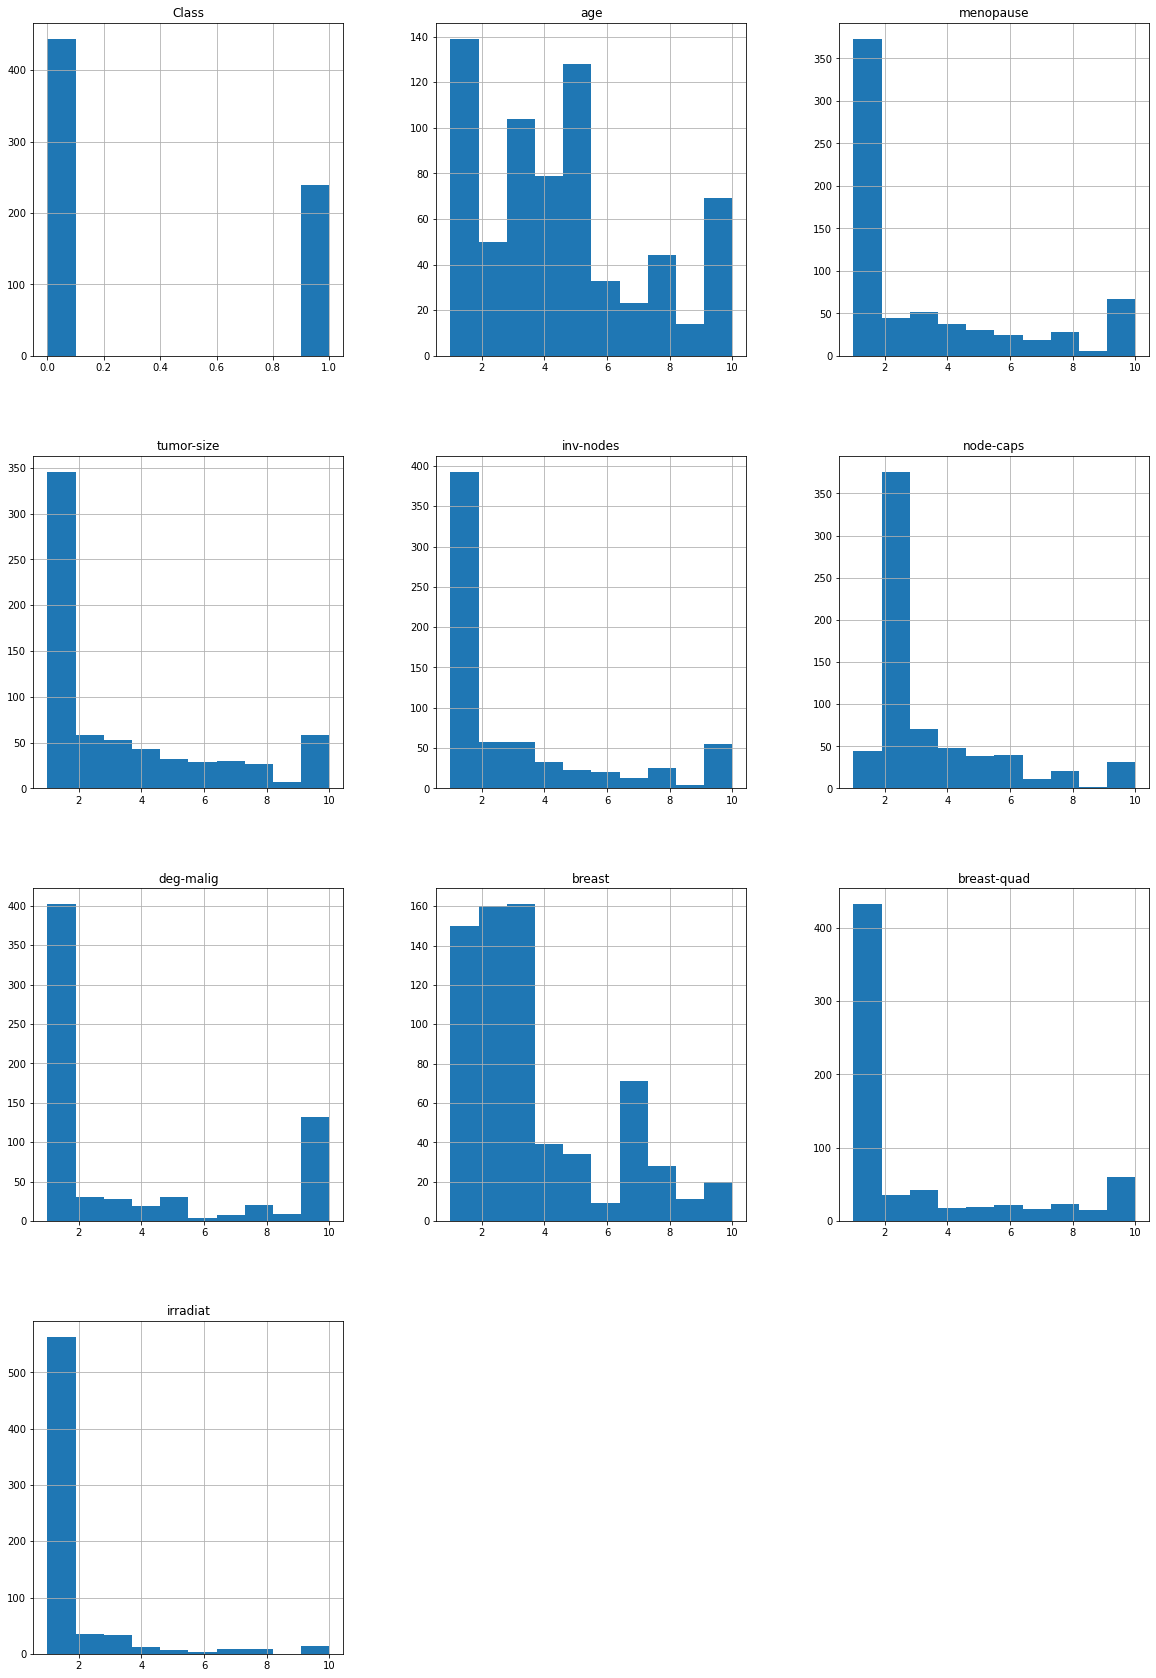

In [10]:
dataset.hist(figsize=(20,30))

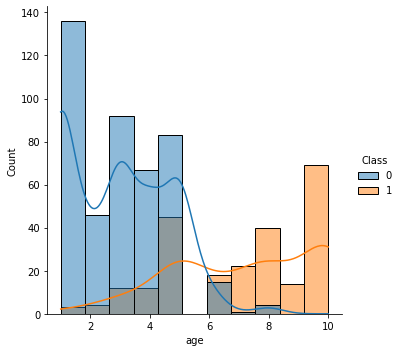

In [11]:
sns.displot(dataset, x="age", hue="Class", kde=True)

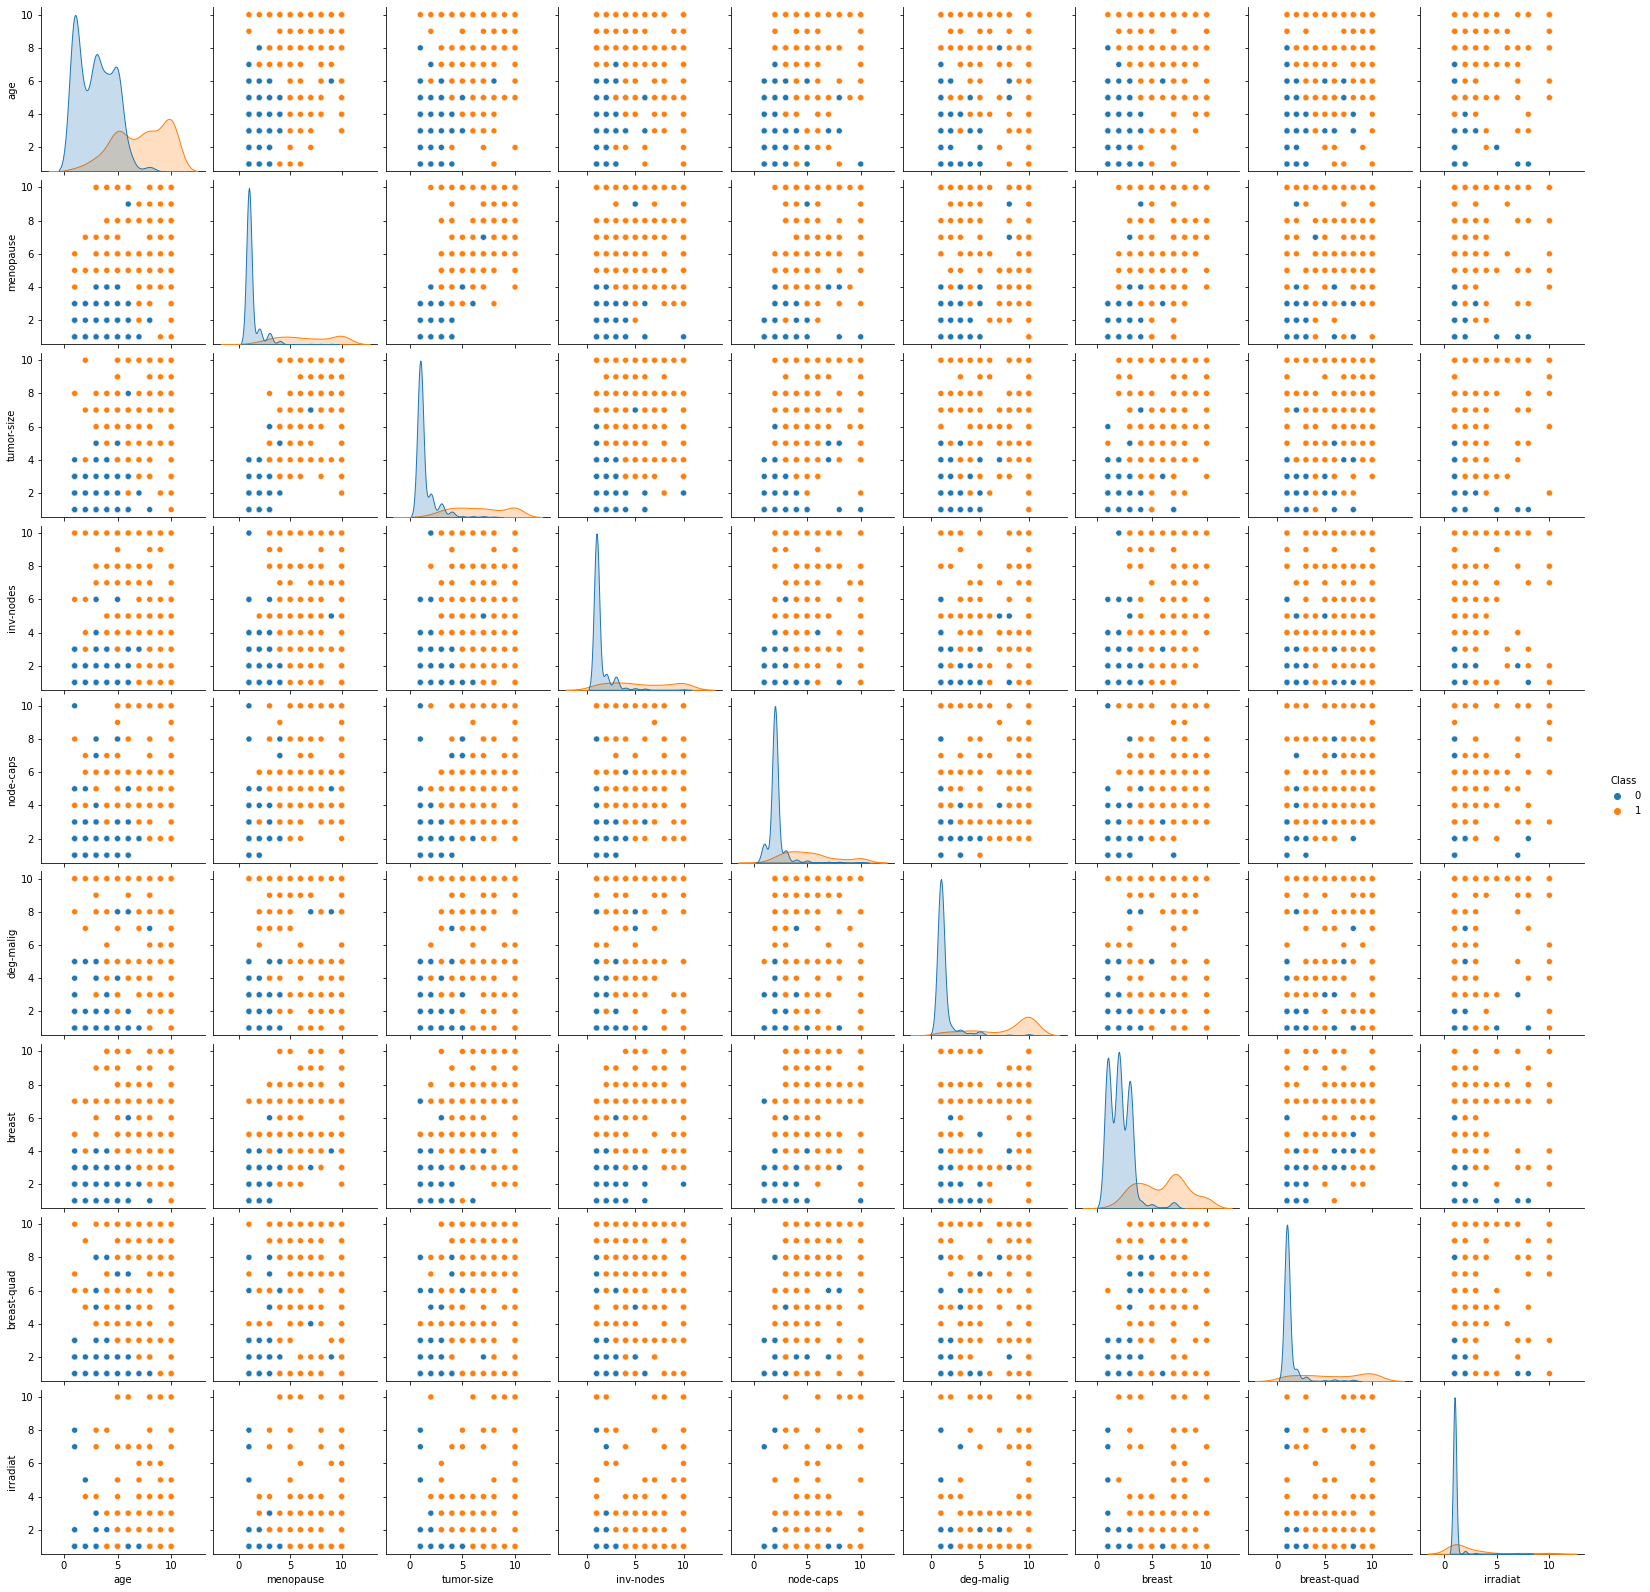

In [12]:
sns.pairplot(dataset, hue="Class")

In [13]:
dataset.corr()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
Class,1.000000,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448
age,0.714790,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957
menopause,0.820801,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755
tumor-size,0.821891,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258
inv-nodes,0.706294,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898
node-caps,0.690958,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583
deg-malig,0.822696,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210
breast,0.758228,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011
breast-quad,0.718677,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757
irradiat,0.423448,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000


<AxesSubplot:ylabel='Class'>

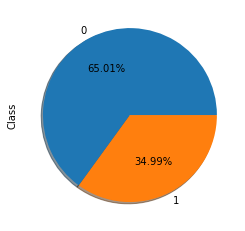

In [14]:
dataset['Class'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

In [15]:
dataset['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [16]:
dataset.columns

Index(['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [17]:
y = dataset['Class']

In [18]:
X = dataset[['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat']]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
print(X_train)

     age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
556    7          6          10          5          3         10       9   
66     8          3           8          3          4          9       8   
571    8         10          10         10          6         10      10   
299    1          1           1          1          2          1       1   
355    1          1           3          1          1          1       2   
..   ...        ...         ...        ...        ...        ...     ...   
9      4          2           1          1          2          1       2   
359    5          1           1          2          2          1       2   
192    1          1           1          1          2          1       1   
629    3          1           1          1          2          1       2   
559   10          9           7          3          4          2       7   

     breast-quad  irradiat  
556           10         2  
66             9         8  


In [21]:
print(y_train)

556    1
66     1
571    1
299    0
355    0
      ..
9      0
359    0
192    0
629    0
559    1
Name: Class, Length: 512, dtype: int64


In [22]:
print(X_test)

     age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
113    1          1           1          1          2          5       1   
378    3          1           1          1          2          1       2   
303    5          5           5          2          5         10       4   
504    4          7           8          3          4         10       9   
301    1          1           1          1          2          1       1   
..   ...        ...         ...        ...        ...        ...     ...   
443    5          1           2          1          2          1       1   
159    4          1           1          1          2          2       3   
317    5          1           1          1          2          1       3   
78     2          2           2          1          1          1       7   
92     2          1           1          1          2          1       3   

     breast-quad  irradiat  
113            1         1  
378            1         1  


In [23]:
print(y_test)

113    0
378    0
303    1
504    1
301    0
      ..
443    0
159    0
317    0
78     0
92     0
Name: Class, Length: 171, dtype: int64


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
print(X_train)

[[ 0.91903747  0.9407658   2.30881719 ...  2.22576767  2.27129602
   0.24623928]
 [ 1.27578287 -0.04290763  1.63138773 ...  1.82407819  1.94996317
   3.74830911]
 [ 1.27578287  2.25233038  2.30881719 ...  2.62745714  2.27129602
  -0.33743902]
 ...
 [-1.22143494 -0.69868992 -0.73961536 ... -0.98774815 -0.62069958
  -0.33743902]
 [-0.50794414 -0.69868992 -0.73961536 ... -0.58605867 -0.62069958
  -0.33743902]
 [ 1.98927367  1.92443923  1.29267301 ...  1.42238871  1.30729749
  -0.33743902]]


In [26]:
print(X_test)

[[-1.22143494 -0.69868992 -0.73961536 ... -0.98774815 -0.62069958
  -0.33743902]
 [-0.50794414 -0.69868992 -0.73961536 ... -0.58605867 -0.62069958
  -0.33743902]
 [ 0.20554667  0.61287466  0.61524355 ...  0.21732028  0.02196611
  -0.33743902]
 ...
 [ 0.20554667 -0.69868992 -0.73961536 ... -0.18436919 -0.62069958
   0.24623928]
 [-0.86468954 -0.37079877 -0.40090064 ...  1.42238871 -0.62069958
  -0.33743902]
 [-0.86468954 -0.69868992 -0.73961536 ... -0.18436919 -0.62069958
  -0.33743902]]


In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [28]:
print(classifier.predict(sc.transform([[1,1,1,1,2,5,1,1,1 ]])))

[0]


In [29]:
y_pred = classifier.predict(X_test)
print(np.concatenate((np.array(y_pred).reshape(len(y_pred),1),np.array(y_test).reshape(len(y_test),1)),1))


[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[104   3]
 [  5  59]]


0.9532163742690059

In [36]:
# Saving model to disk
pickle.dump(classifier, open('Random_forest.pkl','wb'))

<IPython.core.display.Javascript object>